In [2]:
from ftplib import FTP
import os
destdir='//home///shreyansh//python programs//sea and ice project'
directory = '/DATASETS/NOAA/G02135/north/daily/data'
password = 'sunnytyagi886@gmail.com'

ftpdir = 'sidads.colorado.edu'
print('Logging in')
ftp = FTP(ftpdir)
ftp.login('anonymous',password)
print('Changing to '+ directory)
ftp.cwd(directory)
files = ftp.nlst()
files = files[2:]
print(files)
os.chdir(destdir)
for file in files:
    print('Downloading...' + file)
    ftp.retrbinary('RETR ' + file, open(file, 'wb').write)
ftp.quit()

Logging in
Changing to /DATASETS/NOAA/G02135/north/daily/data
['N_seaice_extent_climatology_1981-2010_v3.0.csv', 'N_seaice_extent_daily_v3.0.csv', 'N_seaice_extent_daily_v3.0.csv.bak']
Downloading...N_seaice_extent_climatology_1981-2010_v3.0.csv
Downloading...N_seaice_extent_daily_v3.0.csv
Downloading...N_seaice_extent_daily_v3.0.csv.bak


'221-Goodbye. You uploaded 0 and downloaded 3816 kbytes.\n221 Logout.'

In [38]:
import pandas as pd
df = pd.read_csv("//home//shreyansh/python programs//sea and ice project//sea and ice.csv", usecols = ['Extent'])
print(df)
print(type(df))

       Extent
0      10.231
1      10.420
2      10.557
3      10.670
4      10.777
...       ...
14051   7.791
14052   7.903
14053   8.005
14054   8.077
14055   8.132

[14056 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>


In [39]:
import pandas as pd
import numpy as numpy
import csv as csv
path_to_import ='//home//shreyansh/python programs//sea and ice project//sea and ice.csv'
import_file = pd.read_csv(path_to_import,engine='python',encoding='utf-8-sig')

headers = pd.read_csv(path_to_import,nrows=0).columns.tolist()
print(headers)
columns = ['Extent']

path_to_selected = '//home//shreyansh/python programs//sea and ice project//extent_fetched.csv'
pd.read_csv(path_to_import,usecols=columns, sep=',').to_csv('extent_fetched.csv', index=False)

['Year', 'Month', 'Day', 'Extent', '    Missing', ' Source Data']


In [63]:
from pandas import *
from datetime import date
data=pd.read_csv("//home//shreyansh/python programs//sea and ice project//sea and ice.csv")
year=data['Year'].tolist()
month=data['Month'].tolist()
day=data['Day'].tolist()
extent=data['Extent'].tolist()
fetched_date=[]
def func_date(year,month,day):
    fetched_date.append(date(year,month,day))
    
diction=list(zip(year,month,day))
for i in range(len(diction)):
    func_date(diction[i][0],diction[i][1],diction[i][2])


In [64]:
regular_data=list(zip(fetched_date,extent))

In [65]:
from datetime import date
fetched_extent,regular_extent,regular_date=[],[],[]
for i in range(1,len(regular_data)):
    if (regular_data[i][0]-regular_data[i-1][0]).days==1:
        fetched_extent.append(regular_data[i])
        regular_extent.append(regular_data[i][1])
        regular_date.append(regular_data[i][0])
               


In [45]:
print(f'length of regularity in extent: {len(regular_extent)}')
print(f'date from when the data is regular: {fetched_extent[0][0]}')

length of regularity in extent: 12443
date from when the data is regular: 1987-08-21


In [46]:
import pandas as pd 
dict = {'Date':regular_date,'Extent':regular_extent}      
df = pd.DataFrame(dict)  
df.to_csv('REGULAR_DATE_EXTENT.csv',index=False) 


In [61]:
import pandas as pd 
dict = {'Extent':regular_extent}      
df = pd.DataFrame(dict)  
df.to_csv('REGULAR_EXTENT.csv',index=False) 

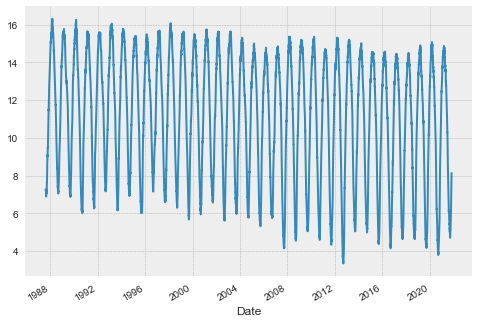

In [48]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('//home///shreyansh//python programs//sea and ice project//REGULAR_DATE_EXTENT.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.plot()
pyplot.show()

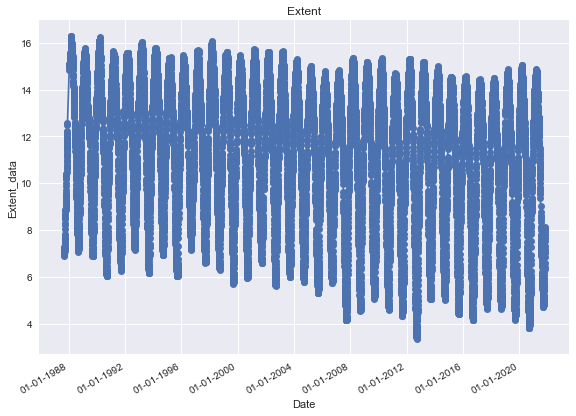

In [49]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates
import pandas as pd
plt.style.use('seaborn')

data = pd.read_csv('//home///shreyansh//python programs//sea and ice project//REGULAR_DATE_EXTENT.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)
extent_date=data['Date']
extent= data['Extent']
plt.plot_date(extent_date, extent, linestyle='solid')
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.tight_layout()
plt.title('Extent')
plt.xlabel('Date')
plt.ylabel('Extent_data')
plt.show()

In [34]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')
import pandas as pd
df = pd.read_csv("//home//shreyansh/python programs//sea and ice project//REGULAR_EXTENT.csv")
df.shape


(12443, 2)

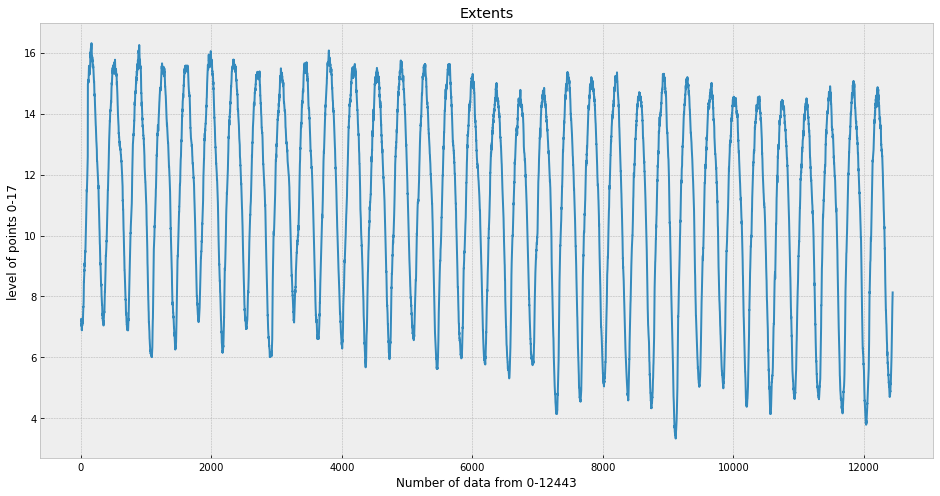

In [35]:
plt.figure(figsize=(16,8))
plt.title('Extents')
plt.xlabel('Number of data from 0-12443')
plt.ylabel('level of points 0-17')
plt.plot(df['Extent'])
plt.show()

In [81]:
future_days=25
df['prediction']=df[['Extent']].shift(-future_days)
#df.tail(4)
#a=df['prediction']
df.head(4)


,Date,Extent,prediction
0,1987-08-21,7.210,7.177
1,1987-08-22,7.210,7.117
2,1987-08-23,7.265,7.223
3,1987-08-24,7.216,7.205


In [93]:
x=np.array(df.drop(['prediction'],1))[:-future_days]
#x=np.array(df['prediction'])[:-future_days]
print(len(x))

12418


/home/shreyansh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [94]:
y=np.array(df['prediction'])[:-future_days]
print(type(y[0]))
print(len(y))

<class 'numpy.float64'>
12418


In [95]:
#split the data into 75% training and 25% testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
print(len(y_test))
print(len(y_test))

3105
3105


In [148]:
#create the model
# create the decision tree regression model
tree=DecisionTreeRegressor().fit(x_train,y_train)
#create the linear regression model
lr=LinearRegression().fit(x_train,y_train)

In [105]:
#get the last 'x' rows of the feature data set
x_future=df.drop(['prediction'],1)[:-future_days]
x_future=x_future.tail(future_days)
x_future=np.array(x_future)
x_future

/home/shreyansh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


array([[4.812, 4.975],
       [4.771, 5.077],
       [4.76 , 5.131],
       [4.708, 5.145],
       [4.703, 5.12 ],
       [4.728, 5.138],
       [4.741, 5.228],
       [4.74 , 5.371],
       [4.741, 5.416],
       [4.778, 5.494],
       [4.839, 5.545],
       [4.837, 5.553],
       [4.859, 5.641],
       [4.904, 5.719],
       [4.881, 5.875],
       [4.975, 5.895],
       [5.077, 5.966],
       [5.131, 6.08 ],
       [5.145, 6.2  ],
       [5.12 , 6.301],
       [5.138, 6.325],
       [5.228, 6.404],
       [5.371, 6.596],
       [5.416, 6.834],
       [5.494, 7.018]])

In [106]:
#show model tree prediction
tree_prediction=tree.predict(x_future)
print(tree_prediction)
print()
#show the linear regression prediction
lr_prediction=lr.predict(x_future)
print(lr_prediction)

[5.545 5.718 5.719 5.719 5.875 5.719 5.966 6.08  6.2   6.301 6.325 7.32
 6.596 6.834 7.018 8.154 7.173 7.309 7.518 7.671 7.791 7.903 8.005 7.424
 8.132]

[5.33503293 5.51889264 5.60977783 5.66296167 5.62696789 5.63998588
 5.77257695 5.99630099 6.06591131 6.16531439 6.20812514 6.22181283
 6.34585913 6.4404407  6.69770764 6.67226071 6.72156702 6.86689481
 7.04569186 7.21834827 7.24494682 7.31396771 7.52735877 7.87158661
 8.11167011]


/home/shreyansh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


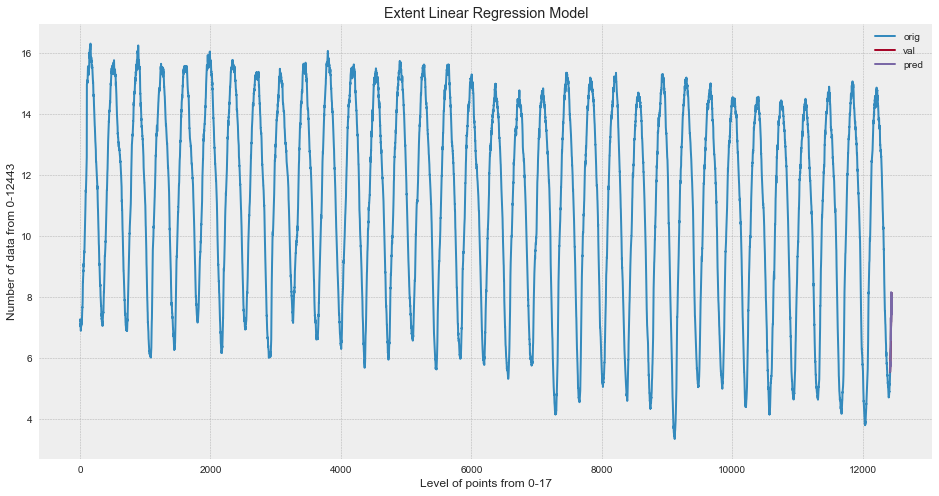

In [107]:
#visualize the data 
predictions=tree_prediction
valid=df[x.shape[0]:]
valid['predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Extent Linear Regression Model')
plt.xlabel('Level of points from 0-17')
plt.ylabel('Number of data from 0-12443')
plt.plot(df['Extent'])
plt.plot(valid[['Extent','predictions']])
plt.legend(['orig','val','pred'])
plt.show()

/home/shreyansh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


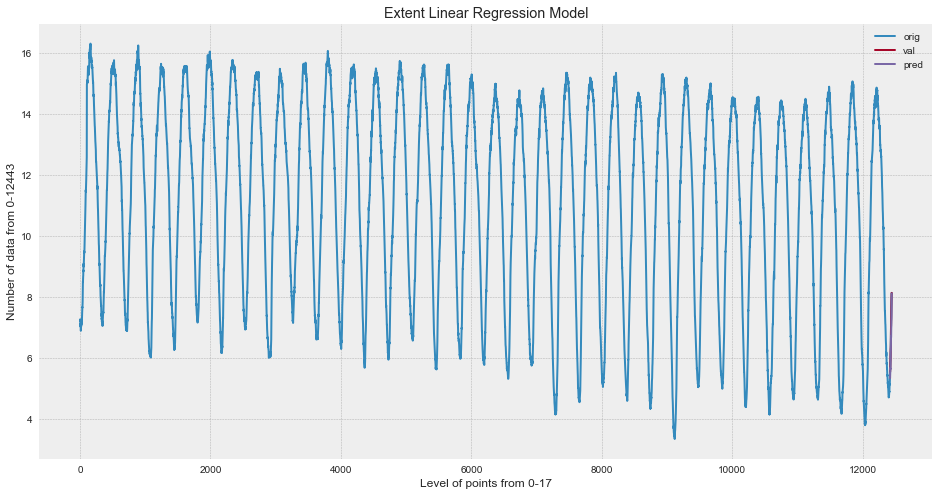

In [108]:
predictions=lr_prediction
valid=df[x.shape[0]:]
valid['predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Extent Linear Regression Model')
plt.xlabel('Level of points from 0-17')
plt.ylabel('Number of data from 0-12443')
plt.plot(df['Extent'])
plt.plot(valid[['Extent','predictions']])
plt.legend(['orig','val','pred'])
plt.show()

In [112]:
cls = linear_model.LinearRegression()
#Fit method is used for fitting your training data into the model
cls.fit(x_train,y_train)

LinearRegression()

In [113]:
prediction = cls.predict(x_test)

In [114]:
cls.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [115]:

print('Co-efficient of linear regression',cls.coef_)

Co-efficient of linear regression [-0.60268841  1.56028912]


In [116]:
print('Intercept of linear regression model',cls.intercept_)

Intercept of linear regression model 0.4727311594714969


In [127]:
print(x_test)
print(y_test)

[[14.678 14.719]
 [ 5.331  4.597]
 [10.387  9.191]
 ...
 [10.839  9.643]
 [13.101 12.427]
 [ 6.734  6.678]]
[14.659  4.369  8.518 ...  8.646 11.763  6.737]


Text(0, 0.5, 'Residual')

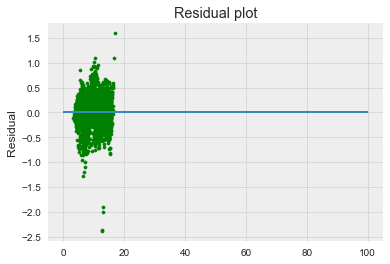

In [120]:
plt.scatter(cls.predict(x_test), cls.predict(x_test) - y_test, c='g', s = 10)
plt.hlines(y=0, xmin=0, xmax=100)
plt.title('Residual plot')
plt.ylabel('Residual')

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [150]:

data = pd.read_csv("//home//shreyansh/python programs//sea and ice project//REGULAR_PREDICTION_EXTENT.csv")

In [151]:
data.head()

,Extent,Prediction
0,7.210,7.041
1,7.210,7.059
2,7.265,7.087
3,7.216,7.041
4,7.157,7.145


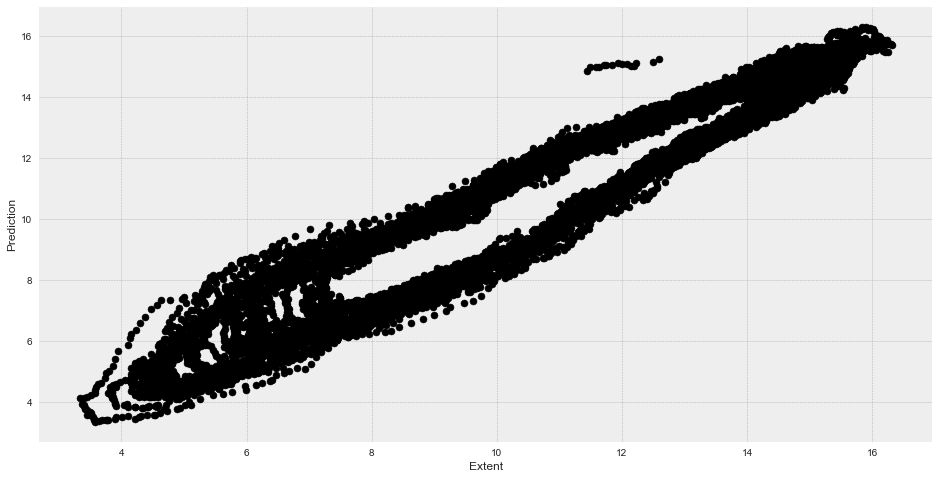

In [153]:
plt.figure(figsize=(16, 8))
plt.scatter(
    data['Extent'],
    data['Prediction'],
    c='black'
)
plt.xlabel("Extent")
plt.ylabel("Prediction")
plt.show()

In [1]:
import numpy as np
import pandas as pd
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)

In [2]:
df = pd.read_csv("//home//shreyansh/python programs//sea and ice project//REGULAR_DATE_EXTENT.csv")


In [3]:
df.head()

,Date,Extent
0,1987-08-21,7.210
1,1987-08-22,7.210
2,1987-08-23,7.265
3,1987-08-24,7.216
4,1987-08-25,7.157


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12443 entries, 0 to 12442
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    12443 non-null  object 
 1   Extent  12443 non-null  float64
dtypes: float64(1), object(1)
memory usage: 194.5+ KB


In [36]:
# Check for missing values in the columns
df.isna().values.any()

False

TypeError: 'locator' must be an instance of matplotlib.ticker.Locator, not a pandas.core.series.Series

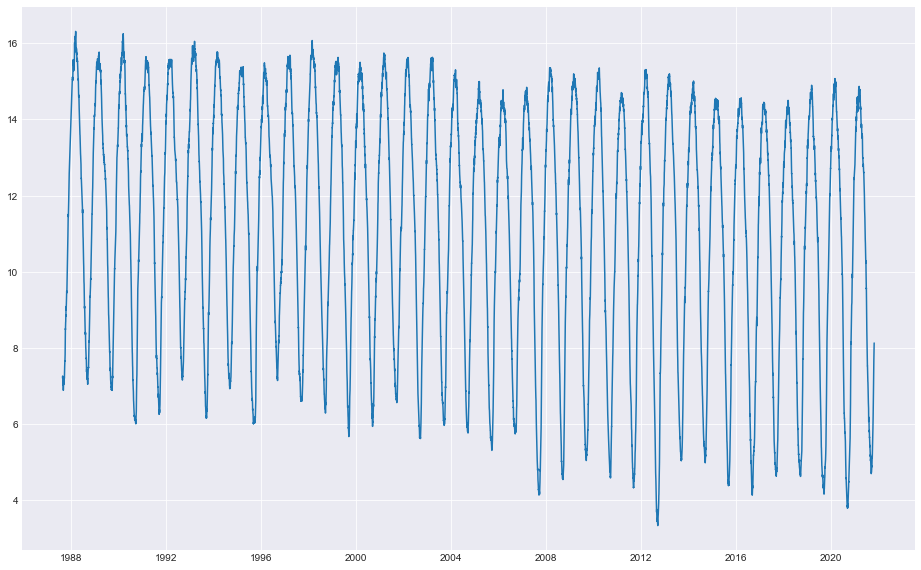

In [5]:
# Import matplotlib package for date plots
import matplotlib.dates as mdates
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
#years = mdates.YearLocator() # Get every year
years = df['Date']
yearsFmt = mdates.DateFormatter('%Y') # Set year format

# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
ax.plot(df['Date'], df['Extent'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# Set figure title
plt.title('Extent History [1988 - 2020]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

In [7]:

from sklearn.model_selection import train_test_split

In [8]:
# Split data into train and test set: 80% / 20%
train, test = train_test_split(df, test_size=0.20)


In [9]:
# Import package for linear model
from sklearn.linear_model import LinearRegression

In [10]:
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Extent']
print(len(X_train))
print(len(y_train))
print(y_train)
y_train=pd.DataFrame(y_train)
print(type(y_train))

9954
9954
7680      6.615
12059     4.730
9594     13.243
10242     7.209
7890     13.616
          ...  
11543    12.368
2313     15.397
10053    14.089
7776     14.115
8925     15.200
Name: Extent, Length: 9954, dtype: float64
<class 'pandas.core.frame.DataFrame'>


In [11]:
# Create LinearRegression Object
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)

LinearRegression()

In [12]:
print('Slope: ', np.asscalar(np.squeeze(model.coef_)))
# The Intercept
print('Intercept: ', model.intercept_)

Slope:  -0.00016316526932186743
Intercept:  [12.1589303]


/home/shreyansh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  """Entry point for launching an IPython kernel.


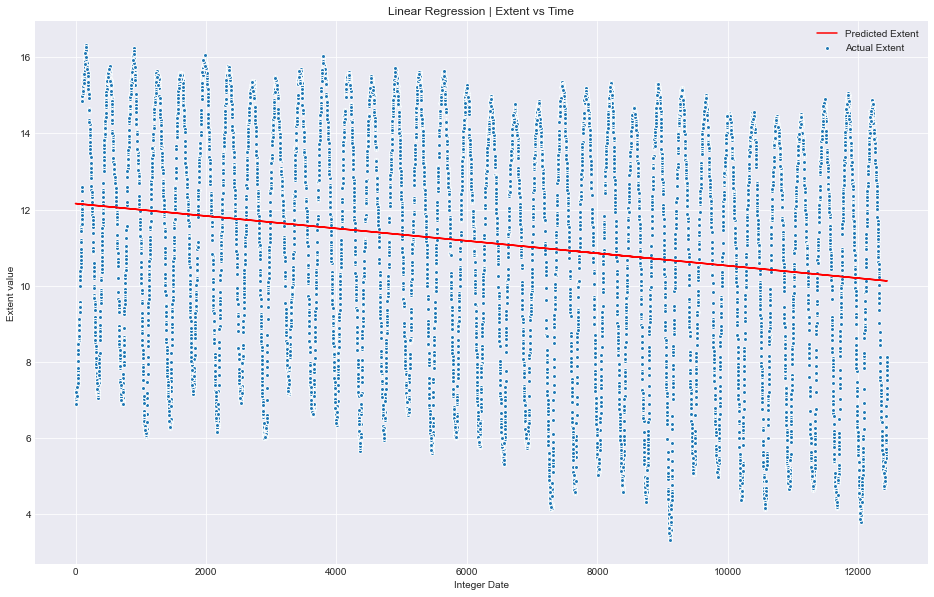

In [13]:
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Extent vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Extent')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Extent')
plt.xlabel('Integer Date')
plt.ylabel('Extent value')
plt.legend()
plt.show()

In [47]:
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Extent']
print(len(X_test))
print(len(y_test))
print(type(X_test))

2489
2489
<class 'numpy.ndarray'>
3438     15.578
5278     15.576
4048      9.523
11401    12.115
3971      7.469
          ...  
7288      4.167
4660     10.449
3485     14.334
1272     15.221
7693      8.667
Name: Extent, Length: 2489, dtype: float64


In [49]:
y_pred = model.predict(X_test)
print(len(y_pred))

2489


In [52]:
print(type(y_pred))
print(y_pred)

<class 'numpy.ndarray'>
[11.5948914  11.27785523 11.48978702 ... 11.5867932  11.96809811
 10.86174526]


In [58]:
import numpy as np
import pandas as pd
y_pred= pd.DataFrame(data = y_pred)
print(type(y_pred))

<class 'pandas.core.frame.DataFrame'>


In [67]:
abc = pd.concat([y_pred.assign(ind="pred"), y_train.assign(ind="train")])

In [66]:
print(abc)

               0    ind  Extent
0      11.594891   pred     NaN
1      11.277855   pred     NaN
2      11.489787   pred     NaN
3      10.222848   pred     NaN
4      11.503054   pred     NaN
...          ...    ...     ...
9903         NaN  train   9.827
12030        NaN  train   3.845
7542         NaN  train  12.481
1445         NaN  train   6.259
8715         NaN  train   5.779

[12443 rows x 3 columns]


In [39]:
df.shape

(12443, 2)

In [40]:
randints = np.random.randint(2550, size=25)

# Select row numbers == random numbers
df_sample = df[df.index.isin(randints)]

In [41]:
df_sample.head()

,Date,Extent
74,1987-11-03,10.256
101,1987-11-30,12.228
546,1989-03-31,15.248
556,1989-04-10,14.656
735,1989-10-06,7.776


In [14]:
import pandas as pd
df_source1 = pd.read_csv('//home//shreyansh//python programs//sea and ice project//REGULAR_DATE_EXTENT.csv',header=None) 
df_source2 = pd.read_csv('//home//shreyansh//python programs//sea and ice project//REGULAR_PREDICTION_EXTENT.csv',header=None) 
df_source1['Prediction']=df_source2[1] 
df_source1.to_csv('//home//shreyansh//python programs//sea and ice project//REGULAR_DATE_PREDICTION_EXTENT.csv',header=False,index=False)
print(df_source1)

                0       1  Prediction
0            Date  Extent  Prediction
1      1987-08-21    7.21       7.041
2      1987-08-22    7.21       7.059
3      1987-08-23   7.265       7.087
4      1987-08-24   7.216       7.041
...           ...     ...         ...
12439  2021-10-24   7.791         NaN
12440  2021-10-25   7.903         NaN
12441  2021-10-26   8.005         NaN
12442  2021-10-27   8.077         NaN
12443  2021-10-28   8.132         NaN

[12444 rows x 3 columns]


In [4]:
df_sample=pd.read_csv('//home//shreyansh//python programs//sea and ice project//REGULAR_DATE_PREDICTION_EXTENT.csv')


In [ ]:
import numpy as np
import pandas as pd
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)
fig, ax = plt.subplots()
df_sample.plot(x='Date', y=['Extent', 'Prediction'], kind='bar', ax=ax)

# Set figure title
plt.title('Comparison Predicted vs Actual Price in Sample data selection', fontsize=16)

# 

# Set x label
plt.xlabel('Date', fontsize=14)

# Set y label
plt.ylabel('Stock Price in $', fontsize=14)

# Show plot
plt.show()